# Lending Case Study by Abhishek Singh & Fouziya Memon

## Problem Statement -
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 


## Exploratory Data Analysis

### Loan Dataset Extraction

In [ ]:
## import python libraries
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import io 

In [458]:
#Extracting the dataset of past loan and its status along with other details from .csv
lc_data = pd.read_csv(f"F:\IITB\Lending Loan Case Study\loan\loan.csv")

In [459]:
# Displaying the fetched data, added to first 5 rows to manually visualize the data
lc_data.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [460]:
#Below representing the number of rows - 39717 & Column - 111
lc_data.shape

(39717, 111)

In [461]:
#Checking for the duplicate rows in dataset based on id column

print(lc_data.duplicated(subset=None,keep='first').count())
duplicate_data=da1[lc_data.duplicated(['id'])]
duplicate_data

#There are no duplicate rows in loan dataset

39717


,id,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,year,month,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups,installment_groups,funded_amnt_inv_group,loan_amnt_groups,dti_groups


### Dataset Cleanup

#### Missing Value Analysis

In [464]:
#Checking count of NULL values in each column in dataset
print(lc_data.isnull().sum())

#Observation - There are many columns which has all the values as NULL

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [465]:
#NULL value analysis of the dataset in the form of percentage
print(lc_data.isna().mean()*100)

id                                 0.00
member_id                          0.00
loan_amnt                          0.00
funded_amnt                        0.00
funded_amnt_inv                    0.00
term                               0.00
int_rate                           0.00
installment                        0.00
grade                              0.00
sub_grade                          0.00
emp_title                          6.19
emp_length                         2.71
home_ownership                     0.00
annual_inc                         0.00
verification_status                0.00
issue_d                            0.00
loan_status                        0.00
pymnt_plan                         0.00
url                                0.00
desc                              32.58
purpose                            0.00
title                              0.03
zip_code                           0.00
addr_state                         0.00
dti                                0.00


<AxesSubplot:>

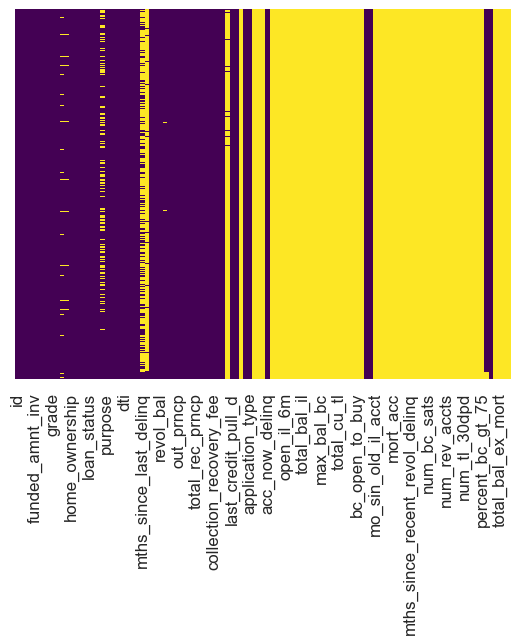

In [318]:
#Visualization of NULL value in the datasets
#Obeservation - All yellow colour marked are representing NULL values
sns.heatmap(lc_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [468]:
#Assigning NULL values analysis in the form of percentage to lc_null_per to find the all column which has 100% NULL values
lc_null_per = lc_data.isna().mean()*100

In [469]:
#Extracting all columns which only NULL values
lc_null_columns=lc_null_per[lc_null_per>=100].index
lc_null_columns

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [470]:
#Droping specific columns because of 100% null percentage
lc_data.drop(lc_null_per[lc_null_per>=100].index,axis=1,inplace=True) 

In [471]:
#Re checking the missing value analysis of the dataset in the form of percentage
#After dropping all columns having NULL values only
print(lc_data.isna().mean()*100)

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.19
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
desc                         32.58
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
mths_since_last_deli

In [324]:
#Below representing the number of left over rows - 39717 & Column - 57
lc_data.shape

(39717, 57)

In [472]:
# Checking unique count of values of each column
# This analysis will help in deciding which other column can be dropped from dataset
unique_counts = lc_data.nunique().sort_values(ascending=True)

# Print the sorted unique value counts
print("Sorted unique value counts of each columns:")
print(unique_counts)

#Observation - Based on the below result and domain understanding all columns having value count 1 can be dropped
# It can be dropped due to sigular value and will not give any insight in EDA
#chargeoff_within_12_mths column is relevant for the analysis however it has no appropriate value, either '0' or NULL

Sorted unique value counts of each columns:
tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
pymnt_plan                        1
initial_list_status               1
term                              2
next_pymnt_d                      2
pub_rec_bankruptcies              3
loan_status                       3
verification_status               3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_deli

In [473]:
#Dropping of all column based on above observation
lc_data.drop(['delinq_amnt',"tax_liens",'chargeoff_within_12_mths','pymnt_plan','initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'application_type'], axis = 1, inplace = True)
lc_data.head(5)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,NaN,10,0,5598,21%,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.00,NaN,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.00


In [474]:
#Below representing the number of left over rows - 39717 & Columns - 48
lc_data.shape

(39717, 48)

In [475]:
# Re checking the unique value count to ensure covered all columns
unique_counts = lc_data.nunique().sort_values(ascending=True)

# Print the sorted unique value counts
print("Sorted unique value counts of each columns:")
print(unique_counts)


Sorted unique value counts of each columns:
next_pymnt_d                   2
term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 5
pub_rec                        5
grade                          7
inq_last_6mths                 9
emp_length                    11
delinq_2yrs                   11
purpose                       14
sub_grade                     35
open_acc                      40
addr_state                    50
issue_d                       55
total_acc                     82
mths_since_last_delinq        95
last_pymnt_d                 101
last_credit_pull_d           106
mths_since_last_record       111
int_rate                     371
earliest_cr_line             526
zip_code                     823
loan_amnt                    885
funded_amnt                 1041
revol_util                  1089
out_prncp                   1137
out_prncp_inv               1138

In [478]:
# re checking  the NULL value analysis of the dataset in the form of percentage 
# It require to understand what all columns are still having NULL values
print(lc_data.isna().mean()*100)

id                         0.00
member_id                  0.00
loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_title                  6.19
emp_length                 2.71
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
url                        0.00
desc                      32.58
purpose                    0.00
title                      0.03
zip_code                   0.00
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
earliest_cr_line           0.00
inq_last_6mths             0.00
mths_since_last_delinq    64.66
mths_since_last_record    92.99
open_acc                   0.00
pub_rec                    0.00
revol_ba

<AxesSubplot:>

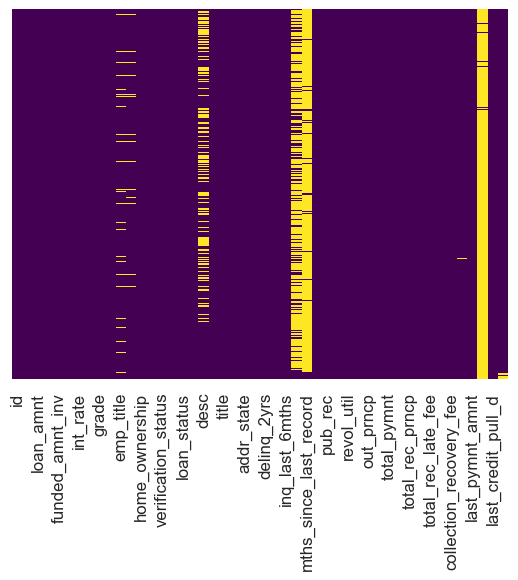

In [477]:
#Visualization of missing value in the datasets
sns.heatmap(lc_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#Observation - Still some columns has majority of values as NULL 

In [479]:
# Loan dataset after above cleanup
lc_data.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,NaN,10,0,5598,21%,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.00,NaN,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.00


In [480]:
# Left over columns
print(lc_data.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')


#### Dataset is left with 48 columns, below are the observations on the few left over columns for further cleanup
- Removing __member_id__,__emp_title__,__url__,__zip_code__,__addr_state__ & __title__ as these are either not impact the analysis or having personal consumer specific details and will not play any significant role in analysis.
- There are some columns which represent post loan approval details hence dropping as the target of the analysis to find out the pattern of consumer of "Charged off", refer below cell for column list.
- Column __desc__ dropping off as its a text field and not in scope of as per target of the analysis.
- Column __funded_amnt__ is also not useful as __funded_amnt_inv__ shows the actual money disbursment hence dropping it.
- Columns __last_credit_pull_d__ & & __earliest_cr_line__ can play a vital role to find the insight however dropping off for now.
- __id__ column can also be deleted but keeping it as an index.

In [481]:
#Consumer specific column or either not require for analysis
lc_data.drop(['member_id','emp_title','url','zip_code','addr_state','title'], axis = 1, inplace = True)
lc_data.drop(["desc",], axis = 1, inplace = True)

In [482]:
lc_data.drop(["last_credit_pull_d"], axis = 1, inplace = True)
lc_data.drop(["funded_amnt"], axis = 1, inplace = True)
lc_data.drop(["earliest_cr_line"], axis = 1, inplace = True)

In [483]:
# Post loan approval columns, hence dropping off
lc_data.drop(['out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d','mths_since_last_delinq','mths_since_last_record'], axis = 1, inplace = True)

In [485]:
# Loan dataset after above cleanup
lc_data.head(5)


,id,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,1077501,5000,4975.00,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,credit_card,27.65,0,1,3,0,13648,83.70%,9,0.00
1,1077430,2500,2500.00,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,1.00,0,5,3,0,1687,9.40%,4,0.00
2,1077175,2400,2400.00,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,small_business,8.72,0,2,2,0,2956,98.50%,10,0.00
3,1076863,10000,10000.00,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,other,20.00,0,1,10,0,5598,21%,37,0.00
4,1075358,3000,3000.00,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.00,Source Verified,Dec-11,Current,other,17.94,0,0,15,0,27783,53.90%,38,0.00


In [486]:
#Below representing the number of left over rows - 39717 & Columns - 24
lc_data.shape

(39717, 24)

In [487]:
# Left over columns
print(lc_data.columns)

Index(['id', 'loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'pub_rec_bankruptcies'],
      dtype='object')


In [489]:
#NULL value analysis of the dataset in the form of percentage after all above cleanup
print(lc_data.isna().mean()*100)
# Obeservation - Now, only emp_length, revol_util, pub_rec_bankruptcies column has NULL values

id                     0.00
loan_amnt              0.00
funded_amnt_inv        0.00
term                   0.00
int_rate               0.00
installment            0.00
grade                  0.00
sub_grade              0.00
emp_length             2.71
home_ownership         0.00
annual_inc             0.00
verification_status    0.00
issue_d                0.00
loan_status            0.00
purpose                0.00
dti                    0.00
delinq_2yrs            0.00
inq_last_6mths         0.00
open_acc               0.00
pub_rec                0.00
revol_bal              0.00
revol_util             0.13
total_acc              0.00
pub_rec_bankruptcies   1.75
dtype: float64


#### Handling Missing values
- emp_length, revol_util, pub_rec_bankruptcies has missing values
- Let observe with below codes to understand wehat kind of data and unique values are present.

#####  pub_rec_bankruptcies missing values handling

In [492]:
# Observing all unique values in pub_rec_bankruptcies column
lc_data.pub_rec_bankruptcies.unique()

array([ 0.,  1.,  2., nan])

In [493]:
#Filling '0' for all NULL values, as "number of public record bankruptcies" are not present for some rows hence filling with '0'
lc_data.pub_rec_bankruptcies.fillna(float('0'),inplace=True)

In [494]:
lc_data.pub_rec_bankruptcies.unique()
#Now there is no NULL values in the column

array([0., 1., 2.])

#####  revol_util missing values handling

In [502]:
# Observing all unique values in revol_bal column
lc_data.revol_bal.unique()

array([13648,  1687,  2956, ..., 27185, 66033, 85607], dtype=int64)

In [503]:
#Filling '0' for all NULL values, as "revol_util" are not present for some rows hence filling with '0'
lc_data.revol_util.fillna('0',inplace=True)

In [504]:
lc_data.revol_util.unique()
#Now there is no NULL values in the column

array(['83.70%', '9.40%', '98.50%', ..., '49.63%', '0.04%', '7.28%'],
      dtype=object)

#####  emp_length missing values handling

In [505]:
print("Mode : "+ lc_data.emp_length.mode()[0])
lc_data.emp_length.value_counts()

#Observation - It can be seen Mode 10+ has higher frequency and also Null values
#It has very limited numbers hence replacing null with 10+ years

Mode : 10+ years


10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [509]:
# Replacing NULL with 10+ years
lc_data.emp_length.fillna('10+ years',inplace=True)

In [510]:
#NULL value analysis of the dataset in the form of percentage after all clean up activity
print(lc_data.isna().mean()*100)

id                     0.00
loan_amnt              0.00
funded_amnt_inv        0.00
term                   0.00
int_rate               0.00
installment            0.00
grade                  0.00
sub_grade              0.00
emp_length             0.00
home_ownership         0.00
annual_inc             0.00
verification_status    0.00
issue_d                0.00
loan_status            0.00
purpose                0.00
dti                    0.00
delinq_2yrs            0.00
inq_last_6mths         0.00
open_acc               0.00
pub_rec                0.00
revol_bal              0.00
revol_util             0.00
total_acc              0.00
pub_rec_bankruptcies   0.00
dtype: float64


<AxesSubplot:>

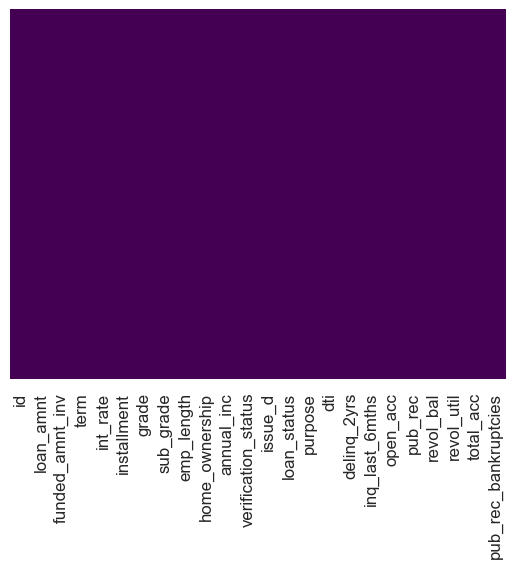

In [511]:
#Visualization of missing value in the datasets
sns.heatmap(lc_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')


##### Observation - It can be observed with above analisys and cleanup all NULL values has been handled

### Data Standardization

 - __Note__ : Observed dataset has a loan details of ongoing loans as well, as we are analyzing the Charged off insight, Loan staus having __Current__ value can be removed

In [512]:
# Unique value in Loan Status column
lc_data.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [513]:
# Removing data having Loan Status = Current
lc_data = lc_data[lc_data.loan_status != "Current"]
lc_data.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [514]:
#Below representing the number of left over rows - 38577 & Columns - 24
lc_data.shape

(38577, 24)

- Standardization of __emp_length__ column by removing 'years' suffix, '+' sign and considering <1 experiance as 0.
- Standardization of __revol_util__ & __int_rate__ by removing '%'.

#### Data Standardization of emp_length 

In [ ]:
#Replacing <1 year with 0 year
lc_data['emp_length'] = lc_data['emp_length'].replace('< 1 year', '0 year')

In [520]:
#Formating employment length column to have only numbers
lc_data['emp_length']=lc_data.emp_length.str.extract('(\d+)')
lc_data.head(2)

,id,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,1077501,5000,4975.00,36 months,10.65%,162.87,B,B2,10,RENT,24000.00,Verified,Dec-11,Fully Paid,credit_card,27.65,0,1,3,0,13648,83.70%,9,0.00
1,1077430,2500,2500.00,60 months,15.27%,59.83,C,C4,0,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,1.00,0,5,3,0,1687,9.40%,4,0.00


In [521]:
#Checking Unique values
lc_data.emp_length.unique()

array(['10', '0', '3', '8', '9', '4', '5', '1', '6', '2', '7'],
      dtype=object)

#### Data Standardization of int_rate & revol_util

In [522]:
#Removing % symbol from intrest rate column so that it can be used in calculations
lc_data.int_rate = pd.to_numeric(lc_data.int_rate.apply(lambda x : x.split('%')[0]))

#Removing % symbol from revol_util column so that it can be used in calculations
lc_data.revol_util = pd.to_numeric(lc_data.revol_util.apply(lambda x : x.split('%')[0]))

## Univariate Analysis

### Univariate Analysis of Numerical variables
- Loan Amount
- dti
- funded_amnt_inv
- int_rate
- annual_inc

count   38577.00
mean    11047.03
std      7348.44
min       500.00
25%      5300.00
50%      9600.00
75%     15000.00
max     35000.00
Name: loan_amnt, dtype: float64
0.75   15000.00
0.80   16000.00
0.85   20000.00
0.88   20000.00
0.90   21600.00
0.92   24000.00
0.93   25000.00
0.94   25000.00
0.95   25000.00
0.96   25000.00
0.97   28000.00
0.98   30000.00
0.99   35000.00
Name: loan_amnt, dtype: float64


<AxesSubplot:xlabel='loan_amnt'>

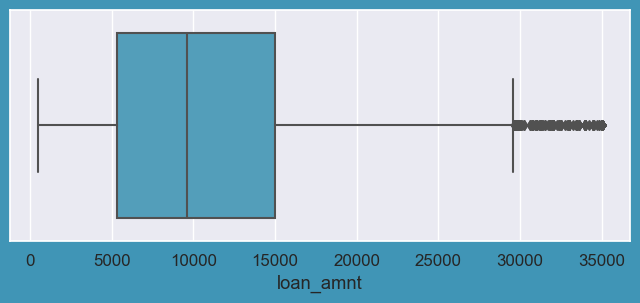

In [386]:
# Basic statistics with .describe() - Quantitative Variables
print(da1['loan_amnt'].describe())

quantile_info_loan_amnt = da1.loan_amnt.quantile([0.75,0.80,0.85,0.88,0.90,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99])
print(quantile_info_loan_amnt)

plt.figure(figsize=(8, 3),facecolor= sns.color_palette('GnBu_d')[-3])
sns.boxplot(da1.loan_amnt,palette='GnBu_d')

count   38577.00
mean       13.27
std         6.67
min         0.00
25%         8.13
50%        13.37
75%        18.56
max        29.99
Name: dti, dtype: float64


<AxesSubplot:xlabel='dti'>

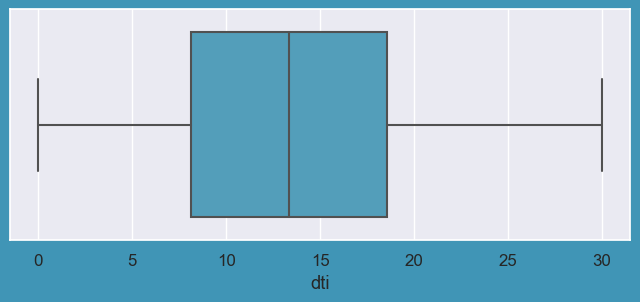

In [387]:
# Basic statistics with .describe() - Quantitative Variables
print(da1['dti'].describe())

plt.figure(figsize=(8, 3),facecolor= sns.color_palette('GnBu_d')[-3])
sns.boxplot(da1.dti,palette='GnBu_d')

count   38577.00
mean    10222.48
std      7022.72
min         0.00
25%      5000.00
50%      8733.44
75%     14000.00
max     35000.00
Name: funded_amnt_inv, dtype: float64
0.75   14000.00
0.80   15000.00
0.85   17500.00
0.88   19500.00
0.90   19975.00
0.92   21550.00
0.93   22882.58
0.94   23929.26
0.95   24500.07
0.96   24950.00
0.97   25750.00
0.98   29879.26
0.99   34715.01
Name: funded_amnt_inv, dtype: float64


<AxesSubplot:xlabel='funded_amnt_inv'>

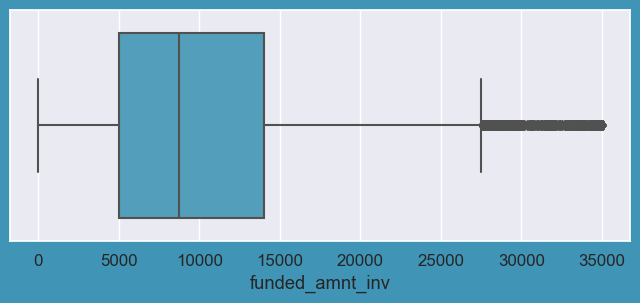

In [388]:
# Basic statistics with .describe() - Quantitative Variables
print(da1['funded_amnt_inv'].describe())

quantile_info_fundedamnt = da1.funded_amnt_inv.quantile([0.75,0.80,0.85,0.88,0.90,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99])
print(quantile_info_fundedamnt)

plt.figure(figsize=(8, 3),facecolor= sns.color_palette('GnBu_d')[-3])
sns.boxplot(da1.funded_amnt_inv,palette='GnBu_d')

count   38577.00
mean       11.93
std         3.69
min         5.42
25%         8.94
50%        11.71
75%        14.38
max        24.40
Name: int_rate, dtype: float64
0.75   14.38
0.80   15.21
0.85   15.96
0.88   16.45
0.90   16.82
0.92   17.39
0.93   17.58
0.94   17.99
0.95   18.31
0.96   18.67
0.97   19.29
0.98   19.91
0.99   20.99
Name: int_rate, dtype: float64


<AxesSubplot:xlabel='int_rate'>

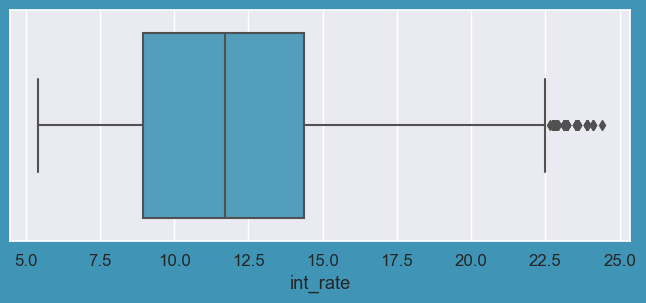

In [389]:
# Basic statistics with .describe() - Quantitative Variables
print(da1['int_rate'].describe())

quantile_info_int_rate= da1.int_rate.quantile([0.75,0.80,0.85,0.88,0.90,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99])
print(quantile_info_int_rate)

plt.figure(figsize=(8, 3),facecolor= sns.color_palette('GnBu_d')[-3])
sns.boxplot(da1.int_rate,palette='GnBu_d')

count     38577.00
mean      68777.97
std       64218.68
min        4000.00
25%       40000.00
50%       58868.00
75%       82000.00
max     6000000.00
Name: annual_inc, dtype: float64


<AxesSubplot:xlabel='annual_inc'>

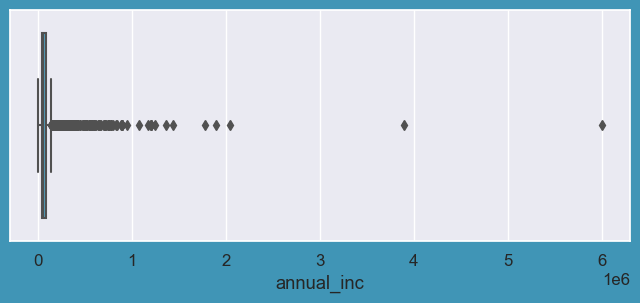

In [390]:
# Basic statistics with .describe() - Quantitative Variables
print(da1['annual_inc'].describe())

plt.figure(figsize=(8, 3),facecolor= sns.color_palette('GnBu_d')[-3])
sns.boxplot(da1.annual_inc,palette='GnBu_d')

In [391]:
quantile_info = da1.annual_inc.quantile([0.25,0.50, 0.75,0.80,0.85,0.88,0.90,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99])
quantile_info

0.25    40000.00
0.50    58868.00
0.75    82000.00
0.80    90000.00
0.85   100000.00
0.88   108057.72
0.90   115000.00
0.92   122000.00
0.93   127500.00
0.94   134000.00
0.95   140004.00
0.96   150000.00
0.97   165000.00
0.98   187000.00
0.99   234144.00
Name: annual_inc, dtype: float64

In [392]:
da1 = da1[da1["annual_inc"] < da1["annual_inc"].quantile(0.97)]


After Removal of Outliers :
count    37384.00
mean     62624.94
std      30214.06
min       4000.00
25%      40000.00
50%      57000.00
75%      80000.00
max     164000.00
Name: annual_inc, dtype: float64


<AxesSubplot:xlabel='annual_inc'>

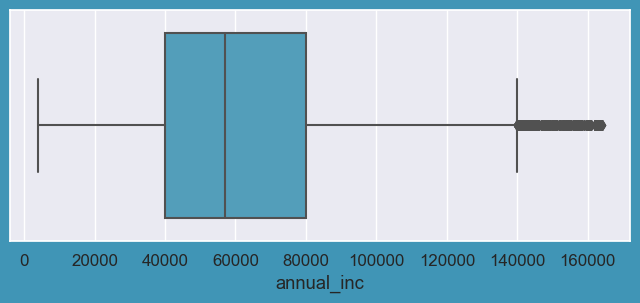

In [393]:
print('After Removal of Outliers :')
print(da1["annual_inc"].describe())

plt.figure(figsize=(8, 3),facecolor= sns.color_palette('GnBu_d')[-3])
sns.boxplot(da1.annual_inc,palette='GnBu_d')

## Derive Columns For Analysis -

In [394]:
# Derived columns
# Lets derive some new columns using existing data as it may further used in analysis.
# create month and year columns separately

da1.issue_d = pd.to_datetime(da1.issue_d, format='%b-%y')
da1['year']=da1['issue_d'].dt.year
da1['month']=da1['issue_d'].dt.month

da1.head(5)

# Observations
# Two new columns month and year were derived from issue date

,id,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,year,month
0,1077501,5000,4975.00,36 months,10.65,162.87,B,B2,10,RENT,24000.00,Verified,2011-12-01,Fully Paid,credit_card,27.65,0,1,3,0,13648,83.70,9,0.00,2011,12
1,1077430,2500,2500.00,60 months,15.27,59.83,C,C4,1,RENT,30000.00,Source Verified,2011-12-01,Charged Off,car,1.00,0,5,3,0,1687,9.40,4,0.00,2011,12
2,1077175,2400,2400.00,36 months,15.96,84.33,C,C5,10,RENT,12252.00,Not Verified,2011-12-01,Fully Paid,small_business,8.72,0,2,2,0,2956,98.50,10,0.00,2011,12
3,1076863,10000,10000.00,36 months,13.49,339.31,C,C1,10,RENT,49200.00,Source Verified,2011-12-01,Fully Paid,other,20.00,0,1,10,0,5598,21.00,37,0.00,2011,12
5,1075269,5000,5000.00,36 months,7.90,156.46,A,A4,3,RENT,36000.00,Source Verified,2011-12-01,Fully Paid,wedding,11.20,0,3,9,0,7963,28.30,12,0.00,2011,12


In [395]:
pd.set_option('display.float_format', '{:.2f}'.format)
da1.annual_inc.describe()

count    37384.00
mean     62624.94
std      30214.06
min       4000.00
25%      40000.00
50%      57000.00
75%      80000.00
max     164000.00
Name: annual_inc, dtype: float64

In [397]:
#creating bins for int_rate,open_acc,revol_util,total_acc
da1['int_rate_groups'] = pd.cut(da1['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
da1['open_acc_groups'] = pd.cut(da1['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
da1['revol_util_groups'] = pd.cut(da1['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
da1['total_acc_groups'] = pd.cut(da1['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
da1['annual_inc_groups'] = pd.cut(da1['annual_inc'], bins=8,precision =0,labels =['0k-20k','20k-40k','40k-60k','60k-80k','80k-100k','100k-120k','120k-140k','140k-170k'])

In [398]:
da1['installment_groups'] = pd.cut(da1['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
da1['funded_amnt_inv_group'] = pd.cut(da1['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) ## bin is starting from -35?
da1['loan_amnt_groups'] = pd.cut(da1['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
da1['dti_groups'] = pd.cut(da1['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

In [400]:
da1.shape

(37384, 35)

### Univariate Analysis of Categorical variables
- term
- grade & sub_grade
- home_ownership
- verification_status
- loan status
- purpose

In [401]:
da1.head(5)

,id,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,year,month,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups,installment_groups,funded_amnt_inv_group,loan_amnt_groups,dti_groups
0,1077501,5000,4975.00,36 months,10.65,162.87,B,B2,10,RENT,24000.00,Verified,2011-12-01,Fully Paid,credit_card,27.65,0,1,3,0,13648,83.70,9,0.00,2011,12,9%-13%,2-10,80-100,2-20,0k-20k,145-274,0-5k,0-5k,24-30
1,1077430,2500,2500.00,60 months,15.27,59.83,C,C4,1,RENT,30000.00,Source Verified,2011-12-01,Charged Off,car,1.00,0,5,3,0,1687,9.40,4,0.00,2011,12,13%-17%,2-10,0-20,2-20,20k-40k,14-145,0-5k,0-5k,0-6
2,1077175,2400,2400.00,36 months,15.96,84.33,C,C5,10,RENT,12252.00,Not Verified,2011-12-01,Fully Paid,small_business,8.72,0,2,2,0,2956,98.50,10,0.00,2011,12,13%-17%,2-10,80-100,2-20,0k-20k,14-145,0-5k,0-5k,6-12
3,1076863,10000,10000.00,36 months,13.49,339.31,C,C1,10,RENT,49200.00,Source Verified,2011-12-01,Fully Paid,other,20.00,0,1,10,0,5598,21.00,37,0.00,2011,12,13%-17%,2-10,20-40,20-37,40k-60k,274-403,5k-10k,5k-10k,18-24
5,1075269,5000,5000.00,36 months,7.90,156.46,A,A4,3,RENT,36000.00,Source Verified,2011-12-01,Fully Paid,wedding,11.20,0,3,9,0,7963,28.30,12,0.00,2011,12,5%-9%,2-10,20-40,2-20,20k-40k,145-274,0-5k,0-5k,6-12


Fully Paid    85.27
Charged Off   14.73
Name: loan_status, dtype: float64


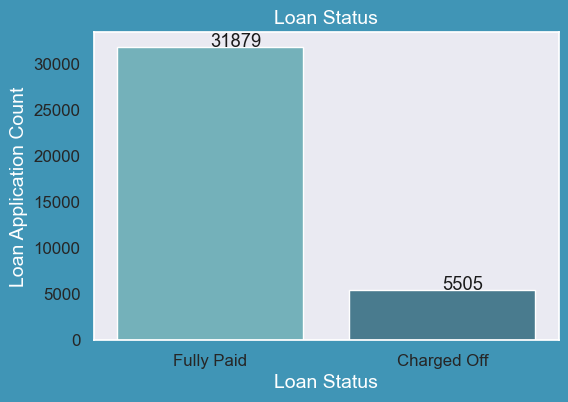

In [402]:
# Univariate Analysis - Unordered Categorical Variables - Loan Status
print((da1.loan_status.value_counts()*100)/len(da1))
plt.figure(figsize=(6,4),facecolor= sns.color_palette('GnBu_d')[-3])
sns.set_style("dark")
ax = sns.countplot(x="loan_status",data=da1,palette='GnBu_d')
ax.set_title('Loan Status',fontsize=14,color='w')
ax.set_xlabel('Loan Status',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')            
# To show count of values above bars
s=da1['loan_status'].value_counts()
for i, v in s.reset_index().iterrows():
    ax.text(i, v.loan_status + 0.3 , v.loan_status, color='k')

# Observations :
# Below plot shows that close to 14% loans were charged off out of total loan issued.

 36 months   75.58
 60 months   24.42
Name: term, dtype: float64


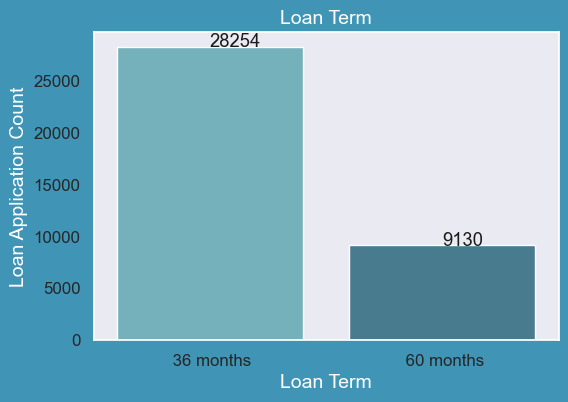

In [403]:
# Univariate Analysis - Unordered Categorical Variables - Loan Term
print((da1.term.value_counts()*100)/len(da1))
plt.figure(figsize=(6,4),facecolor= sns.color_palette('GnBu_d')[-3])
sns.set_style("dark")
ax = sns.countplot(x="term",data=da1,palette='GnBu_d')
ax.set_title('Loan Term',fontsize=14,color='w')
ax.set_xlabel('Loan Term',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')            
# To show count of values above bars
s=da1['term'].value_counts()
for i, v in s.reset_index().iterrows():
    ax.text(i, v.term + 0.3 , v.term, color='k')

# Observations :
# Below plot shows that close to 14% loans were charged off out of total loan issued.

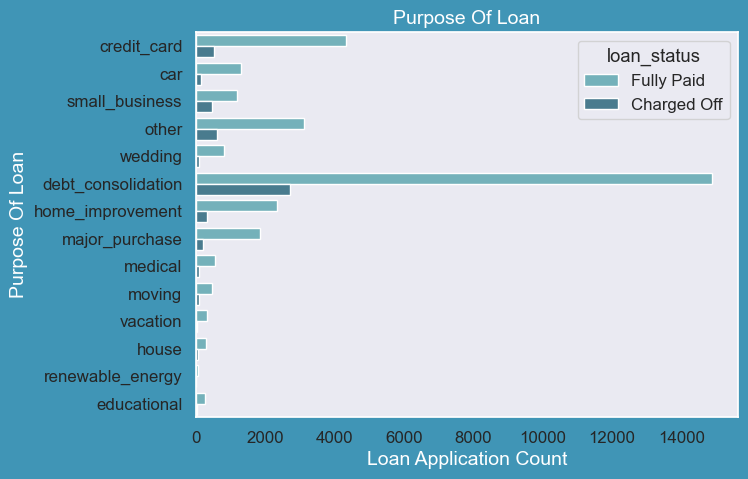

In [404]:
# Univariate Analysis - Unordered Categorical Variables - Purpose Of Loan
(da1.purpose.value_counts()*100)/len(da1)
plt.figure(figsize=(7,5),facecolor= sns.color_palette('GnBu_d')[-3])
sns.set_style("dark")
ax = sns.countplot(y="purpose",data=da1,hue='loan_status',palette='GnBu_d')
ax.set_title('Purpose Of Loan',fontsize=14,color='w')
ax.set_ylabel('Purpose Of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

# Observations :
# Below plot shows that most of the loans were taken for the purpose of debt consolidation & paying credit card bill.
# Number of chraged off count also high too for these loans.

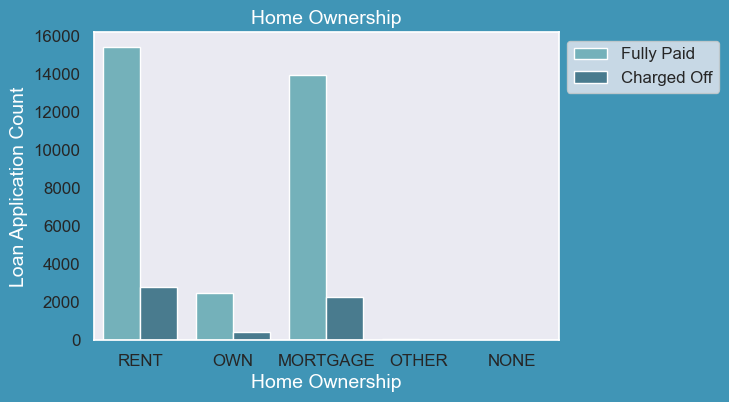

In [405]:
# Univariate Analysis - Unordered Categorical Variables - Home Ownership
palettes='GnBu_d'
plt.figure(figsize=(6,4),facecolor= sns.color_palette('GnBu_d')[-3])
ax = sns.countplot(x="home_ownership",data=da1,hue='loan_status',palette= palettes)
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Home Ownership',fontsize=14,color='w')
ax.set_xlabel('Home Ownership',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

# Observations :
# Below plot shows that most of them living in rented home or mortgazed their home.
# Applicant numbers are high from these categories so charged off is high too.

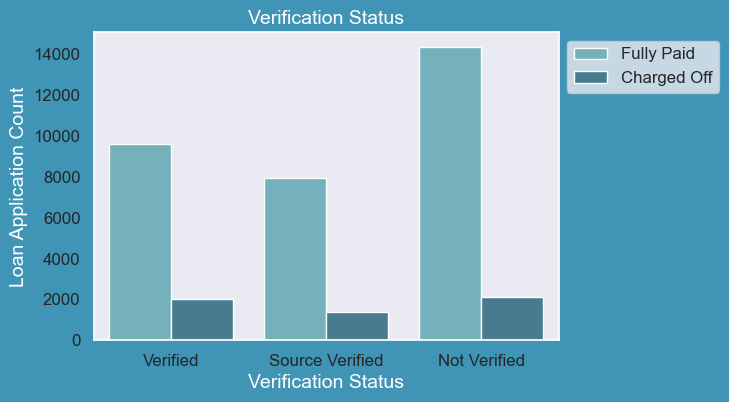

In [406]:
# Univariate Analysis - Unordered Categorical Variables - verified

plt.figure(figsize=(6,4),facecolor= sns.color_palette('GnBu_d')[-3])
ax = sns.countplot(x="verification_status",data=da1,hue='loan_status',palette='GnBu_d')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Verification Status',fontsize=14,color='w')
ax.set_xlabel('Verification Status',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

# Observations :
# Below plot shows that most of them living in rented home or mortgazed their home.
# Applicant numbers are high from these categories so charged off is high too.

In [407]:
da1.sub_grade = pd.to_numeric(da1.sub_grade.apply(lambda x : x[-1]))
da1.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

Text(0, 0.5, 'Loan Application Count')

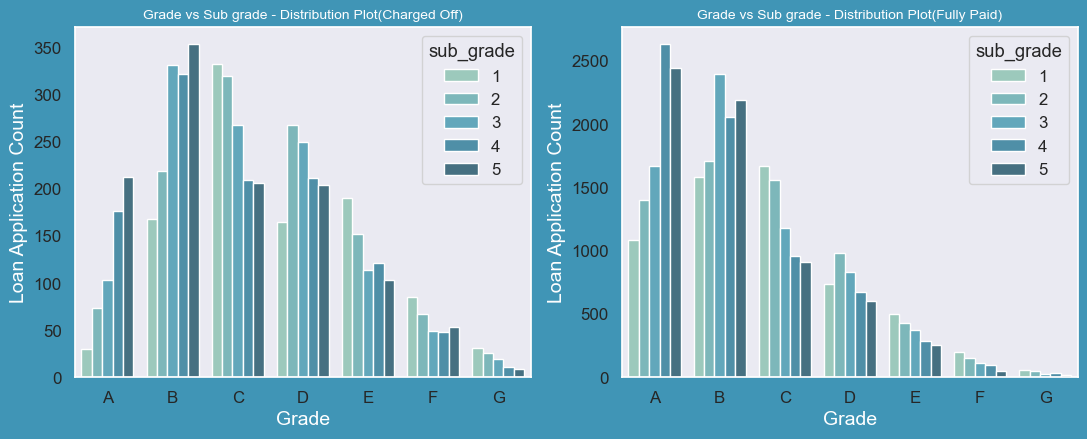

In [408]:
plt.figure(figsize=(20,10),facecolor= sns.color_palette('GnBu_d')[-3])
sns.set_style("dark")
plt.subplot(2, 3, 1)
sns.set_palette('GnBu_d')
ax = sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = da1[da1.loan_status == 'Charged Off'])
ax.set_title('Grade vs Sub grade - Distribution Plot(Charged Off)',fontsize=10,color='w')
ax.set_xlabel('Grade',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')    
plt.subplot(2, 3, 2)
sns.set_palette('GnBu_d')
ax = sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = da1[da1.loan_status == 'Fully Paid'])
ax.set_title('Grade vs Sub grade - Distribution Plot(Fully Paid)',fontsize=10,color='w')
ax.set_xlabel('Grade',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')   

In [409]:
#checking unique values for home_ownership
da1['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [410]:
#replacing 'NONE' with 'OTHERS'
da1['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

In [411]:
#checking unique values for home_ownership
da1['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

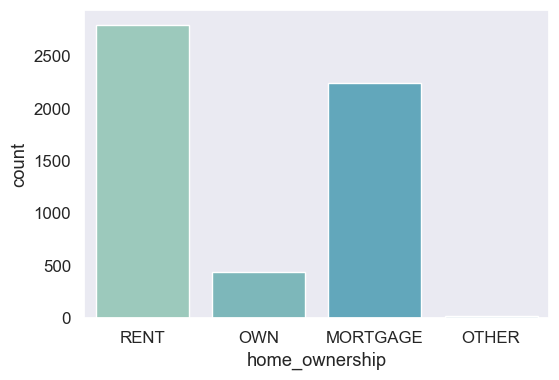

In [412]:
fig, ax = plt.subplots(figsize = (6,4))
#ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=da1[da1['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='count', ylabel='purpose'>

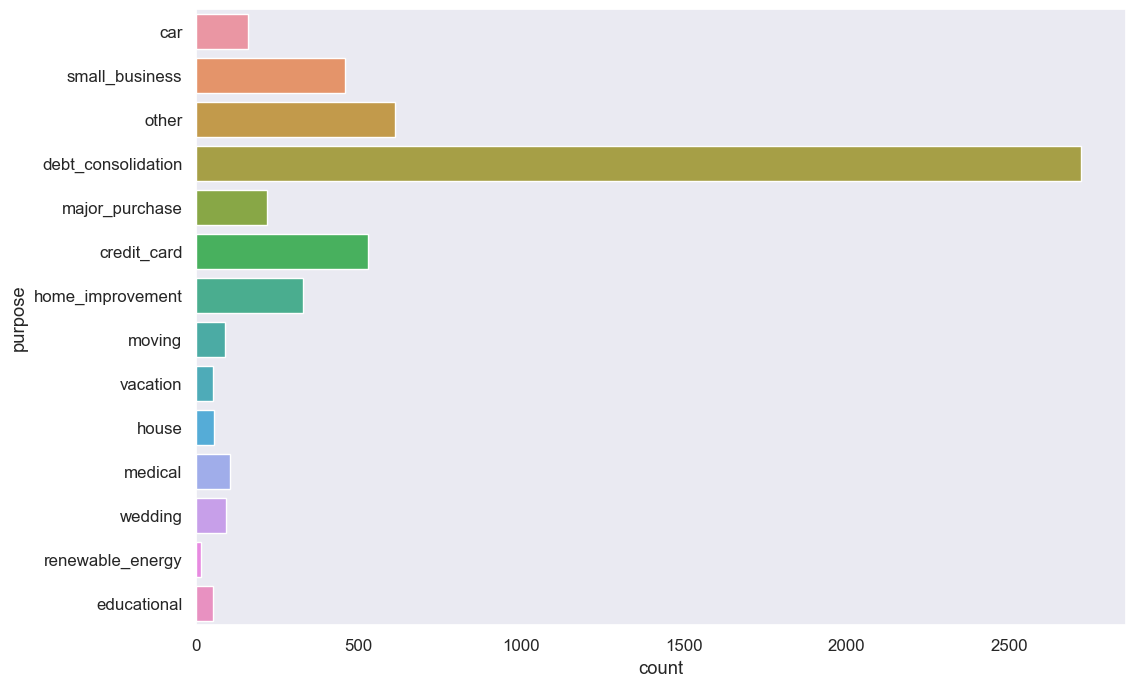

In [413]:
fig, ax = plt.subplots(figsize = (12,8))
sns.countplot(y ='purpose', data=da1[da1.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='emp_length', ylabel='count'>

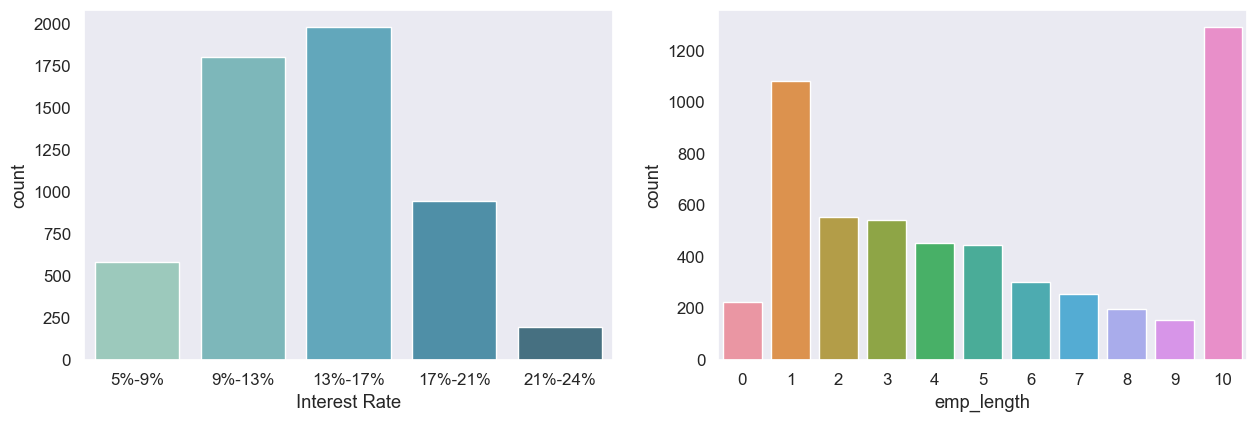

In [414]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='int_rate_groups', data=da1[da1.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')
plt.subplot(222)
sns.countplot(x='emp_length', data=da1[da1.loan_status == 'Charged Off'])

#### Similarly analyzing open_acc,revol_util,total_acc,annual_inc

<AxesSubplot:xlabel='open_acc_groups', ylabel='count'>

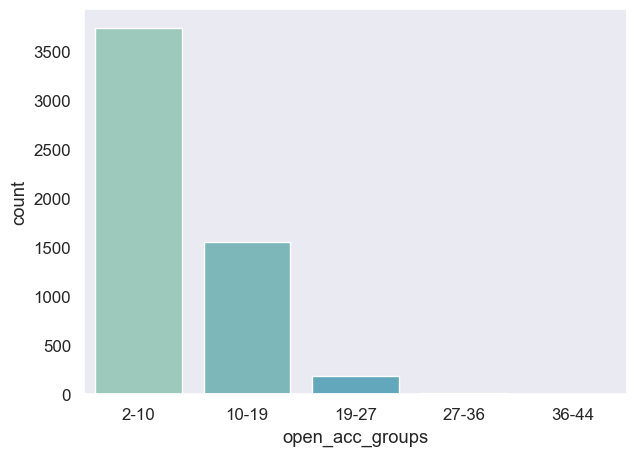

In [415]:
fig, ax = plt.subplots(figsize = (7,5))
sns.countplot(x='open_acc_groups', data=da1[da1.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='revol_util_groups', ylabel='count'>

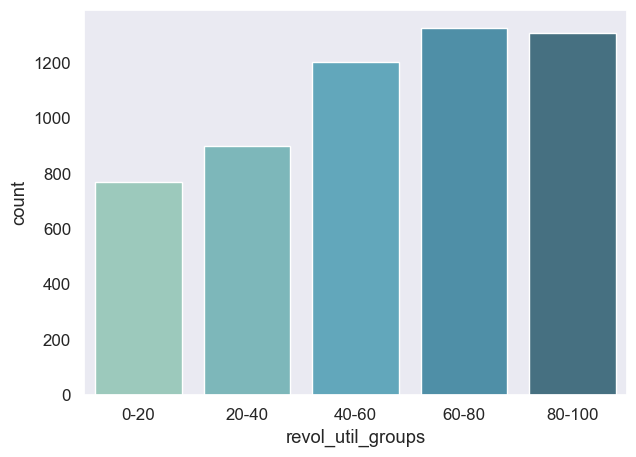

In [416]:
fig, ax = plt.subplots(figsize = (7,5))
sns.countplot(x='revol_util_groups', data=da1[da1.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='total_acc_groups', ylabel='count'>

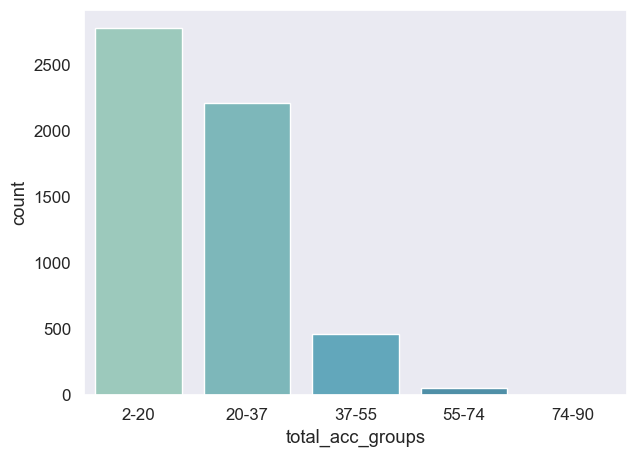

In [417]:
fig, ax = plt.subplots(figsize = (7,5))
sns.countplot(x='total_acc_groups', data=da1[da1.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='annual_inc_groups', ylabel='count'>

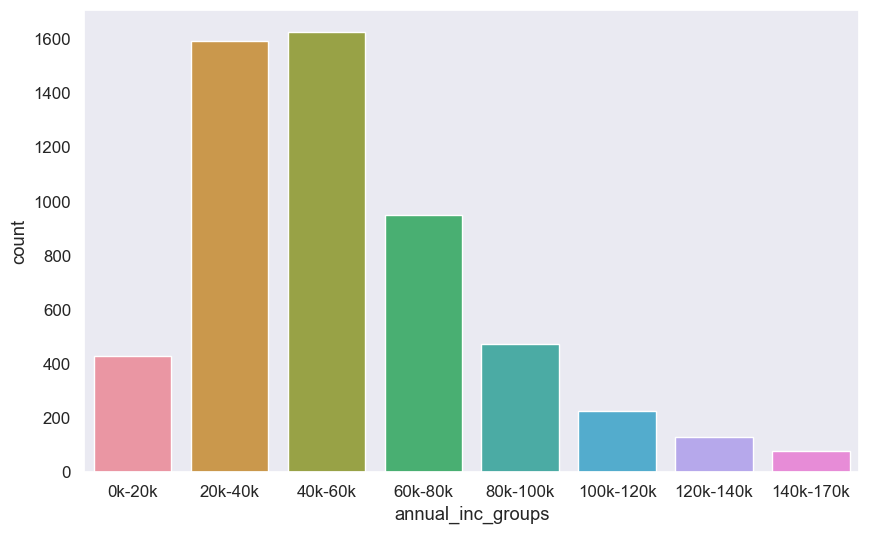

In [418]:
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(x='annual_inc_groups', data=da1[da1.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='inq_last_6mths', ylabel='count'>

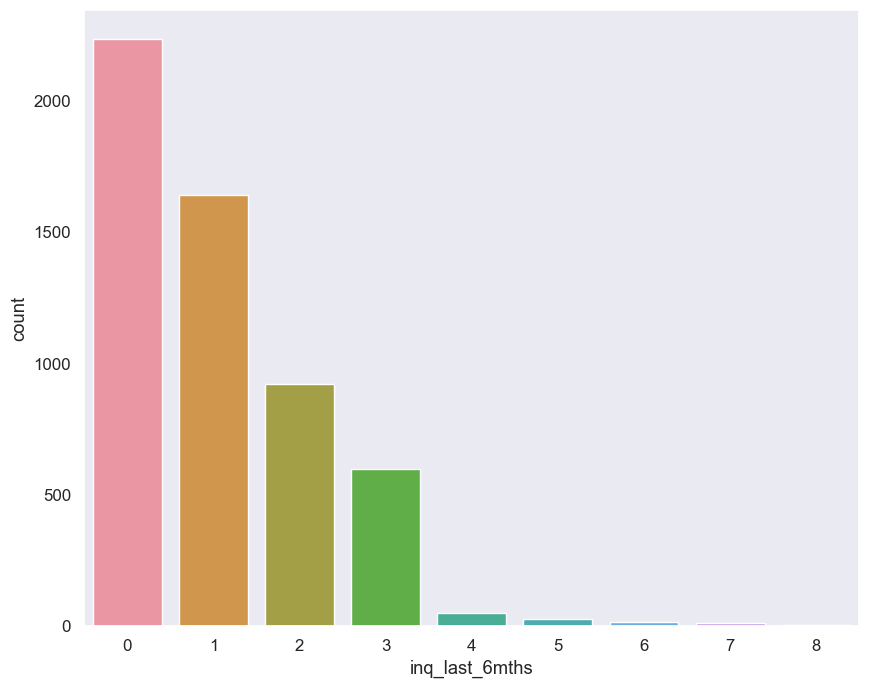

In [420]:
fig,ax = plt.subplots(figsize = (10,8))
sns.countplot(x='inq_last_6mths', data=da1[da1['loan_status']=='Charged Off'])

In [421]:
#####add other charge off one in categorical section

<AxesSubplot:xlabel='pub_rec', ylabel='count'>

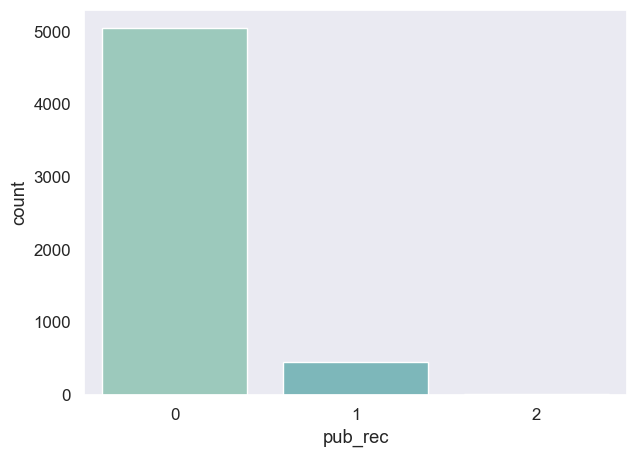

In [422]:
fig,ax = plt.subplots(figsize = (7,5))
sns.countplot(x='pub_rec', data=da1[da1['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='year', ylabel='count'>

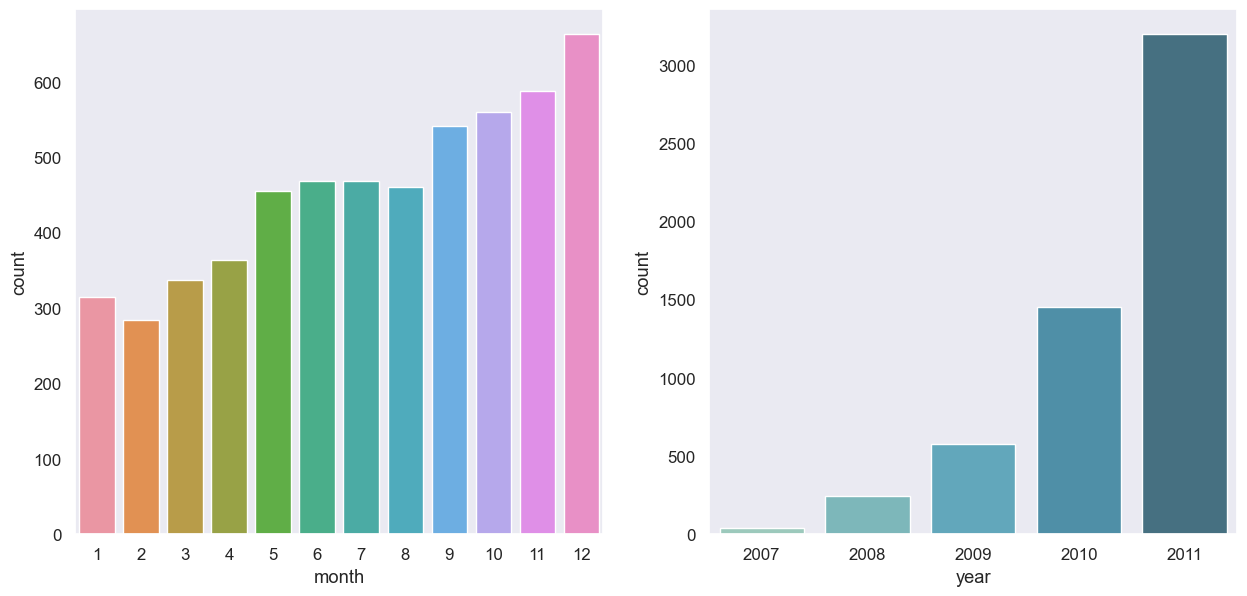

In [423]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='month', data=da1[da1['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='year', data=da1[da1['loan_status']=='Charged Off']) 


<AxesSubplot:xlabel='year', ylabel='count'>

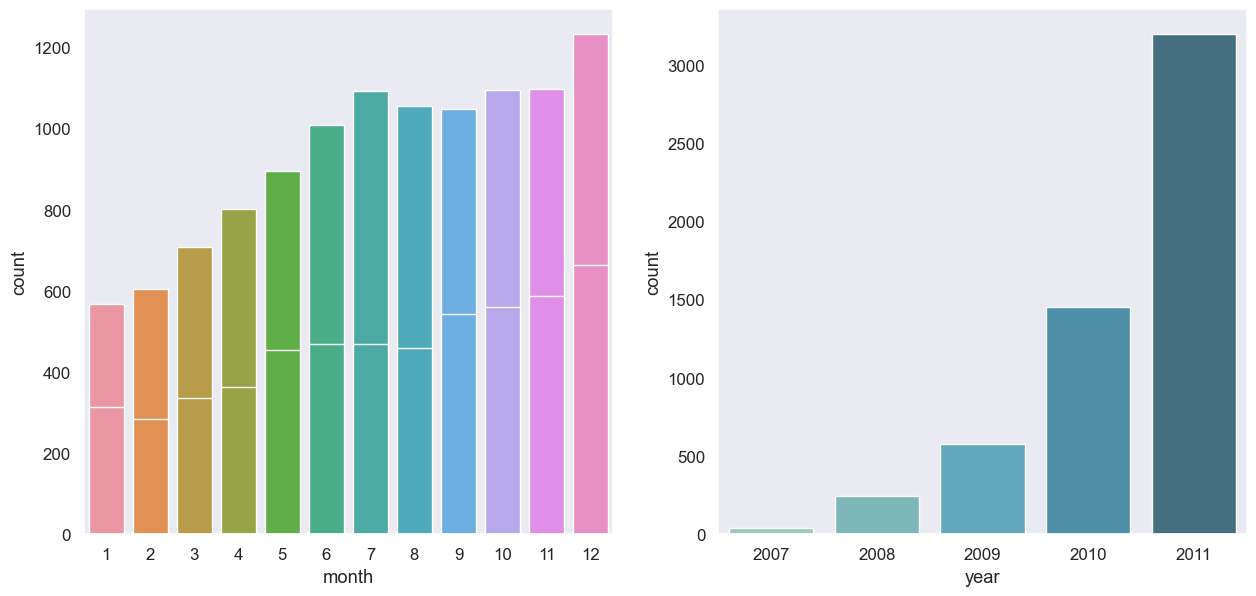

In [424]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='month', data= da1[da1['year']==2010])
sns.countplot(x='month', data= da1[da1['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='year', data=da1[da1['loan_status']=='Charged Off']) 

### Analyzing installment,dti, loan_amnt

<AxesSubplot:xlabel='funded_amnt_inv_group', ylabel='count'>

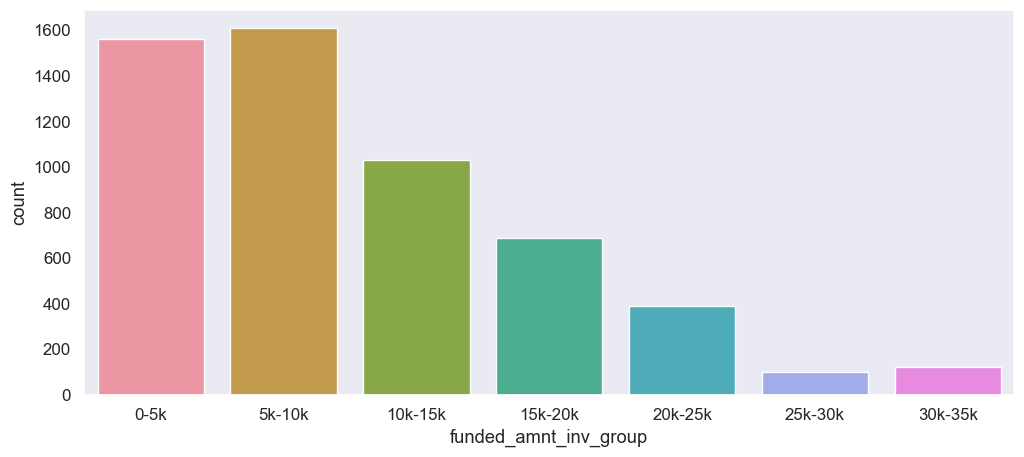

In [425]:
fig,ax = plt.subplots(figsize = (12,5))
sns.countplot(x='funded_amnt_inv_group', data=da1[da1['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='loan_amnt_groups', ylabel='count'>

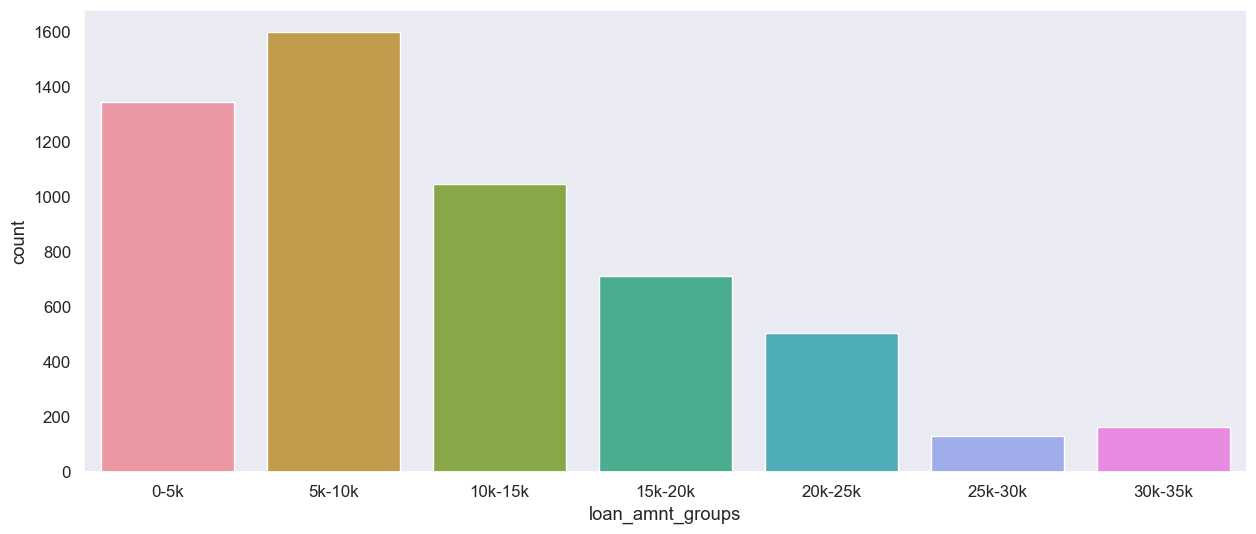

In [426]:
fig,ax = plt.subplots(figsize = (15,6))
sns.countplot(x='loan_amnt_groups', data=da1[da1['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='dti_groups', ylabel='count'>

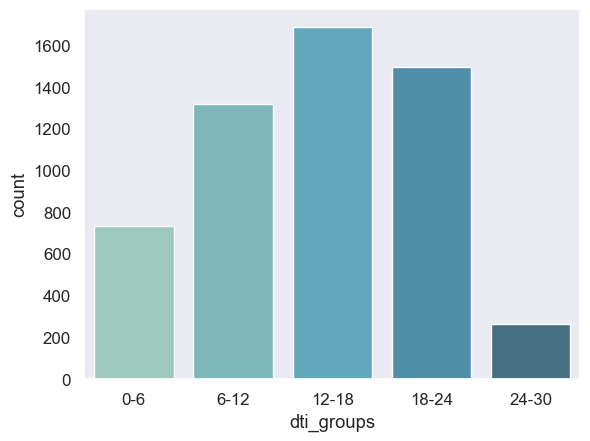

In [427]:
sns.countplot(x='dti_groups', data=da1[da1['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='installment_groups', ylabel='count'>

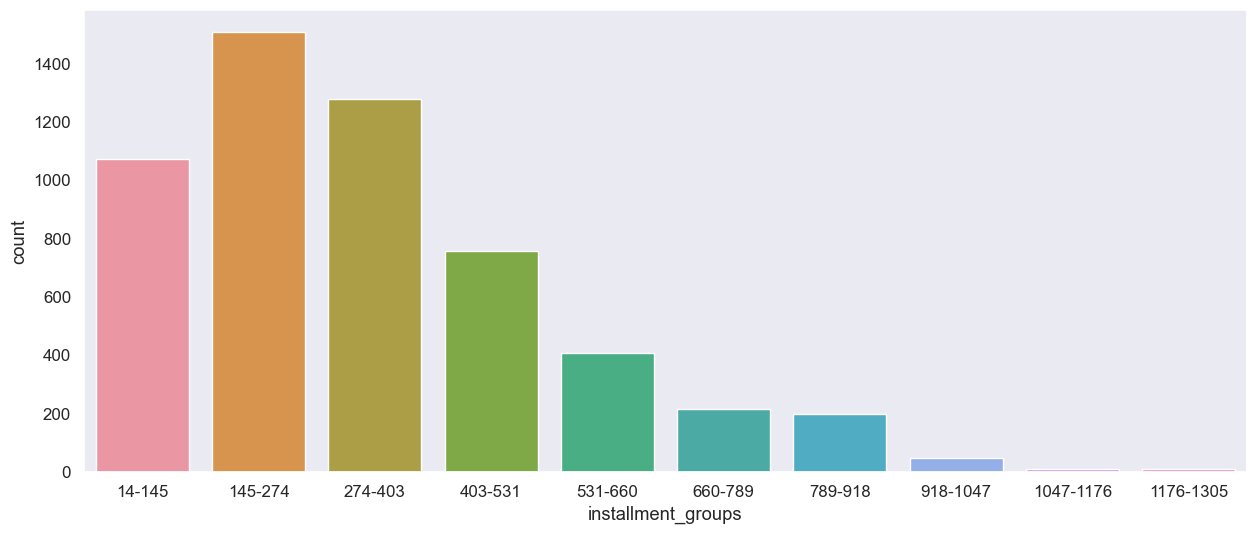

In [428]:
fig,ax = plt.subplots(figsize = (15,6))
sns.countplot(x='installment_groups', data=da1[da1['loan_status']=='Charged Off'])

In [429]:
numeric_columns = ['loan_amnt','funded_amnt_inv','revol_util','emp_length','open_acc','int_rate','installment','annual_inc','dti','pub_rec',]

In [430]:
correlation_matrix = da1[numeric_columns].corr()

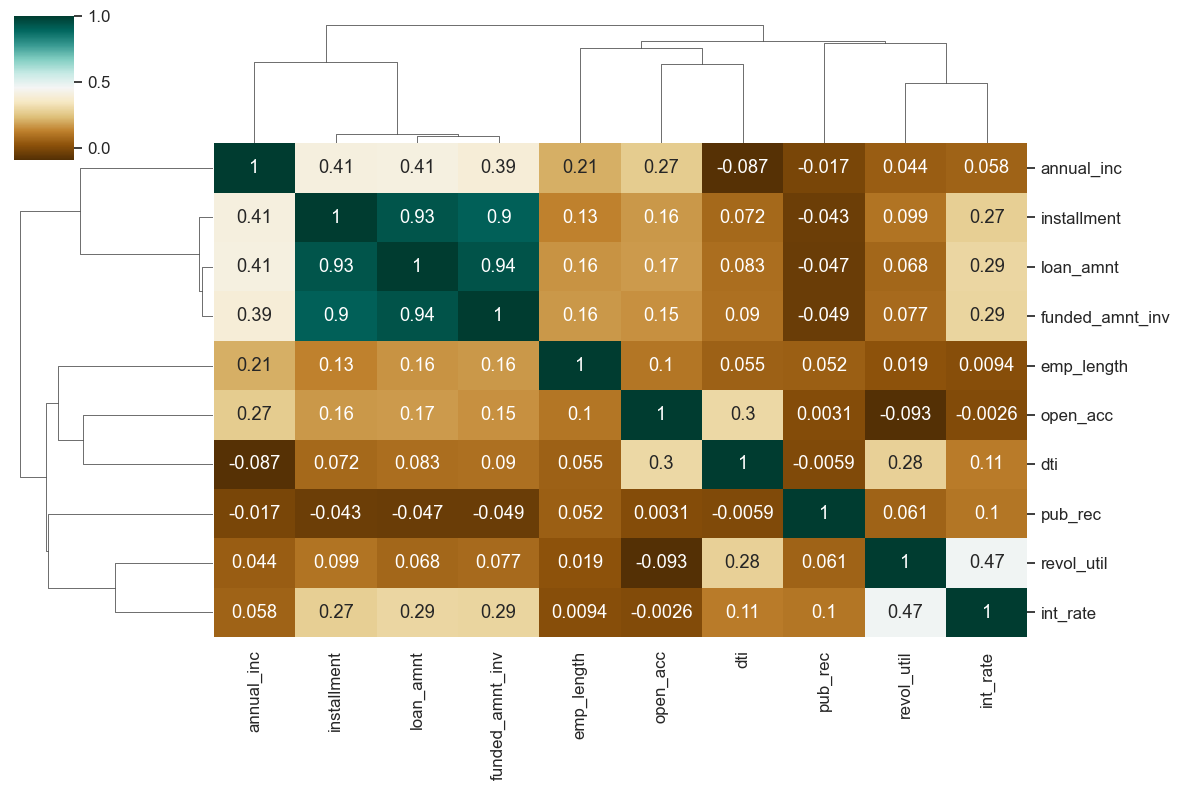

In [436]:
sns.set(font_scale=1.1)
sns.clustermap(correlation_matrix,annot=True,figsize=(12, 8),cmap="BrBG")
plt.show()


## Analysing annual income with other columns for more insights

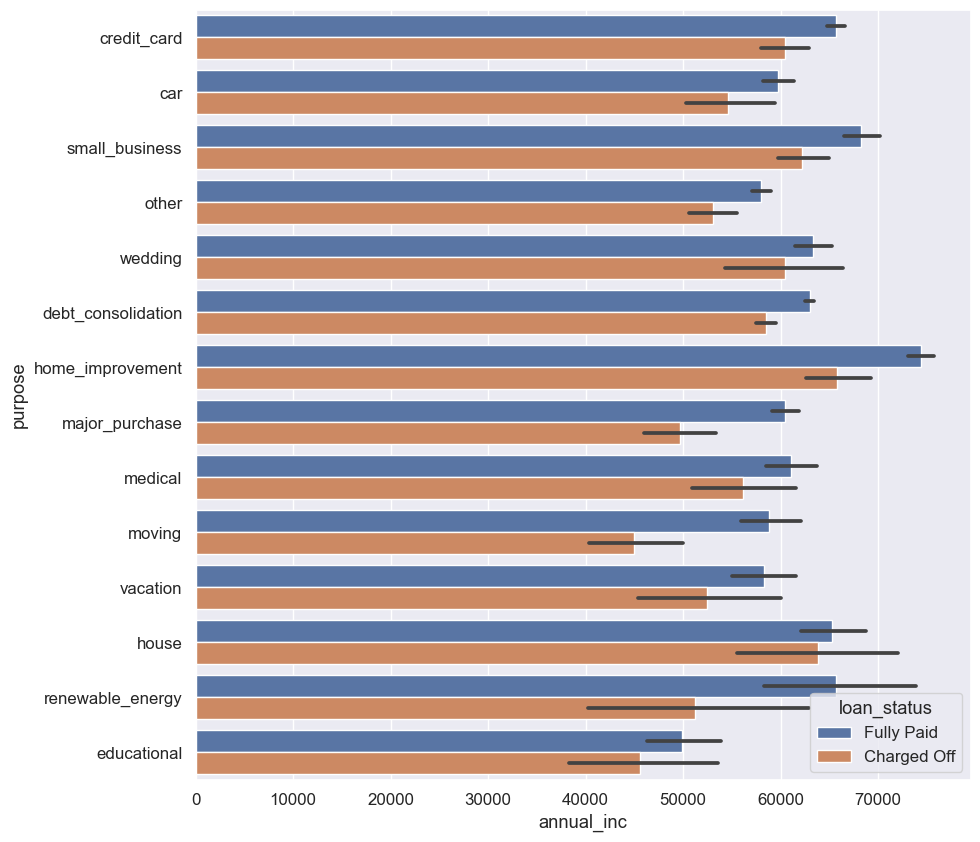

In [432]:
plt.figure(figsize=(10,10))
sns.barplot(data =da1,x='annual_inc', y='purpose', hue ='loan_status',palette="deep")
plt.show()

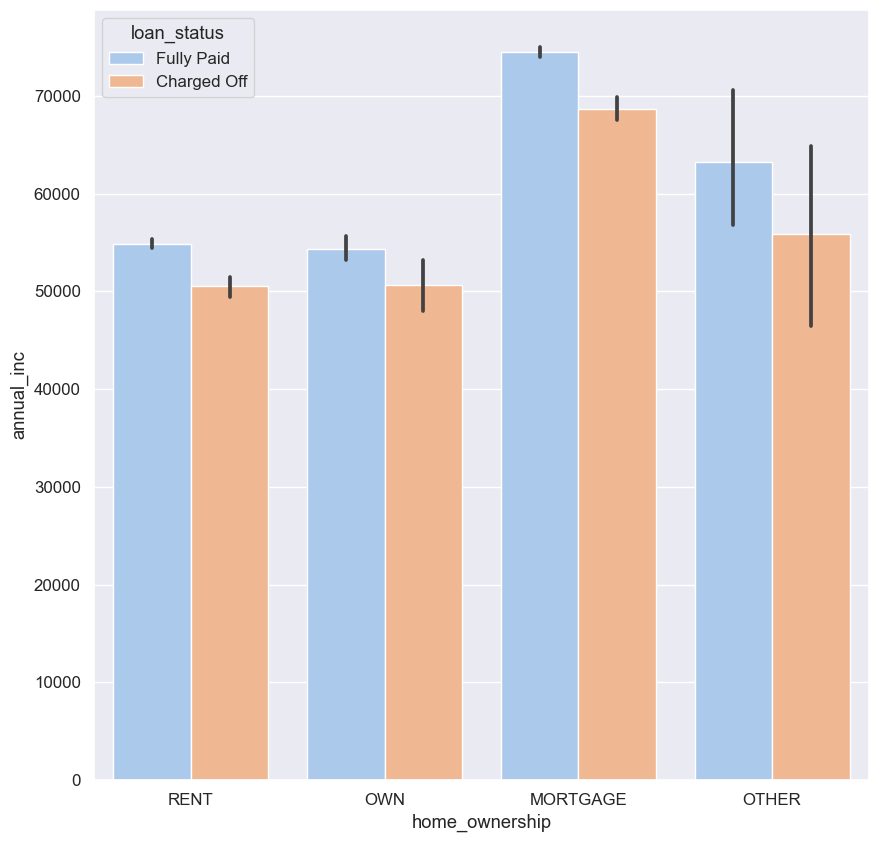

In [433]:
plt.figure(figsize=(10,10))
sns.barplot(data =da1,x='home_ownership', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

In [437]:
da1.head(1)

,id,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,year,month,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups,installment_groups,funded_amnt_inv_group,loan_amnt_groups,dti_groups
0,1077501,5000,4975.00,36 months,10.65,162.87,B,2,10,RENT,24000.00,Verified,2011-12-01,Fully Paid,credit_card,27.65,0,1,3,0,13648,83.70,9,0.00,2011,12,9%-13%,2-10,80-100,2-20,0k-20k,145-274,0-5k,0-5k,24-30


In [ ]:
annual income vs term
annual income vs interrest rate group
annual income vs verification status


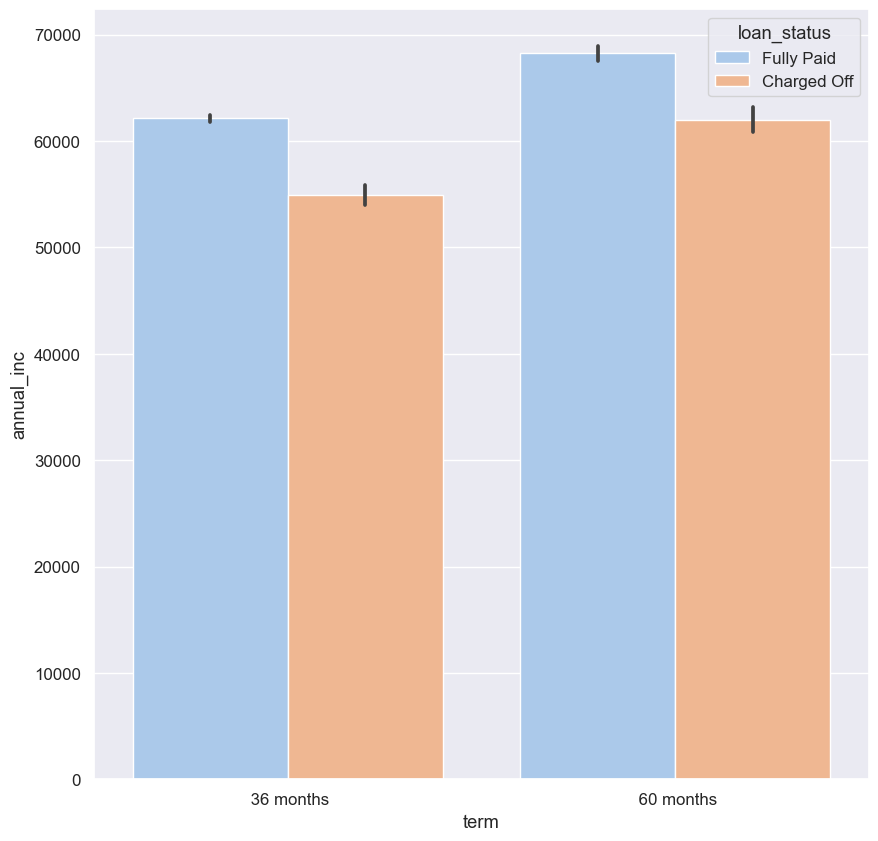

In [438]:
plt.figure(figsize=(10,10))
sns.barplot(data =da1,x='term', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

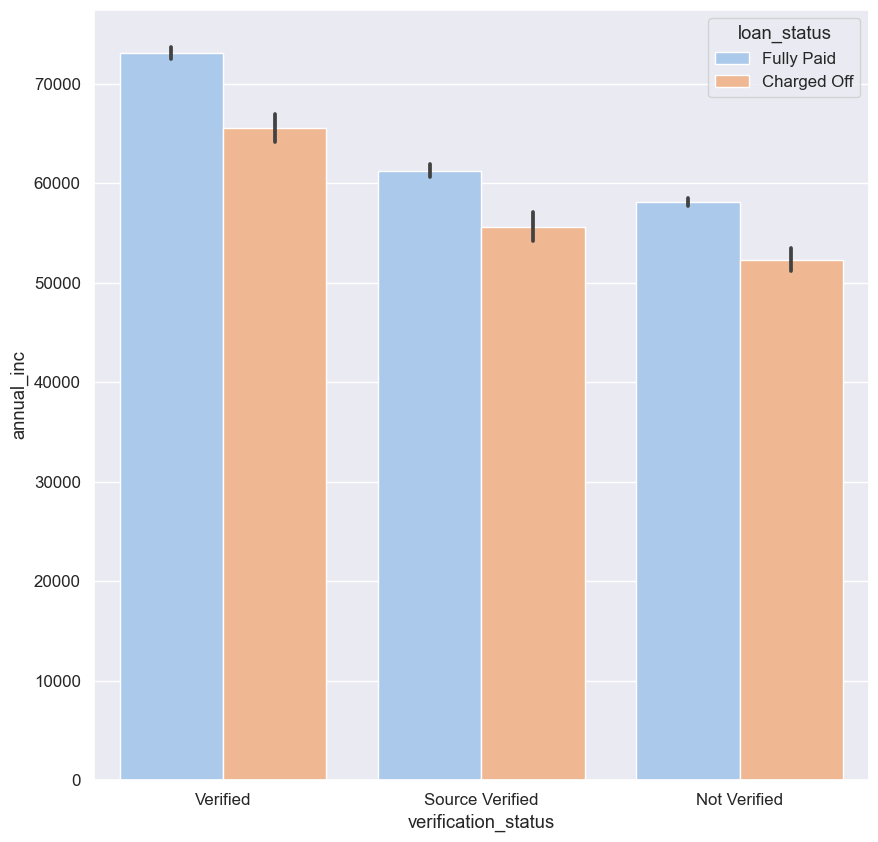

In [439]:
plt.figure(figsize=(10,10))
sns.barplot(data =da1,x='verification_status', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

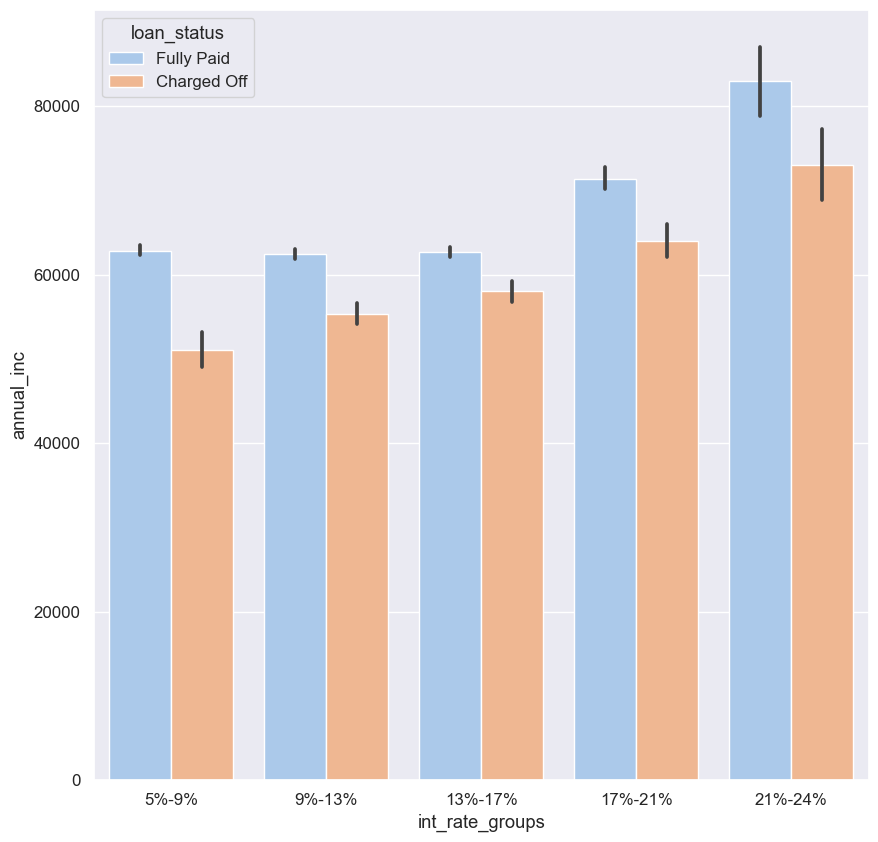

In [440]:
plt.figure(figsize=(10,10))
sns.barplot(data =da1,x='int_rate_groups', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

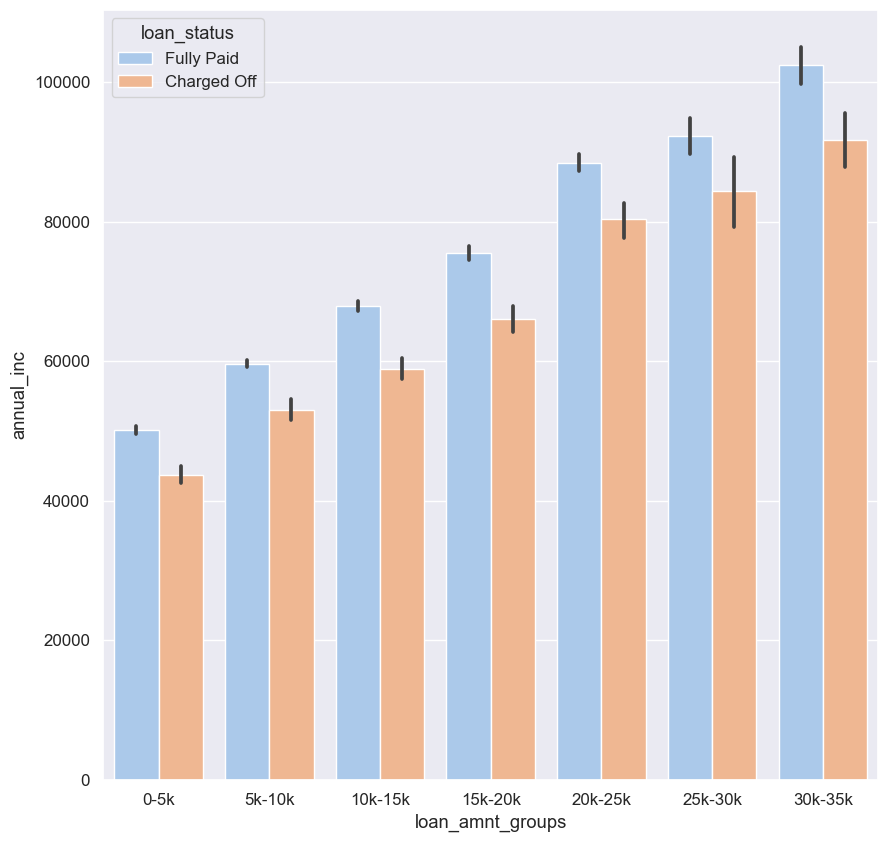

In [441]:
plt.figure(figsize=(10,10))
sns.barplot(data =da1,x='loan_amnt_groups', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

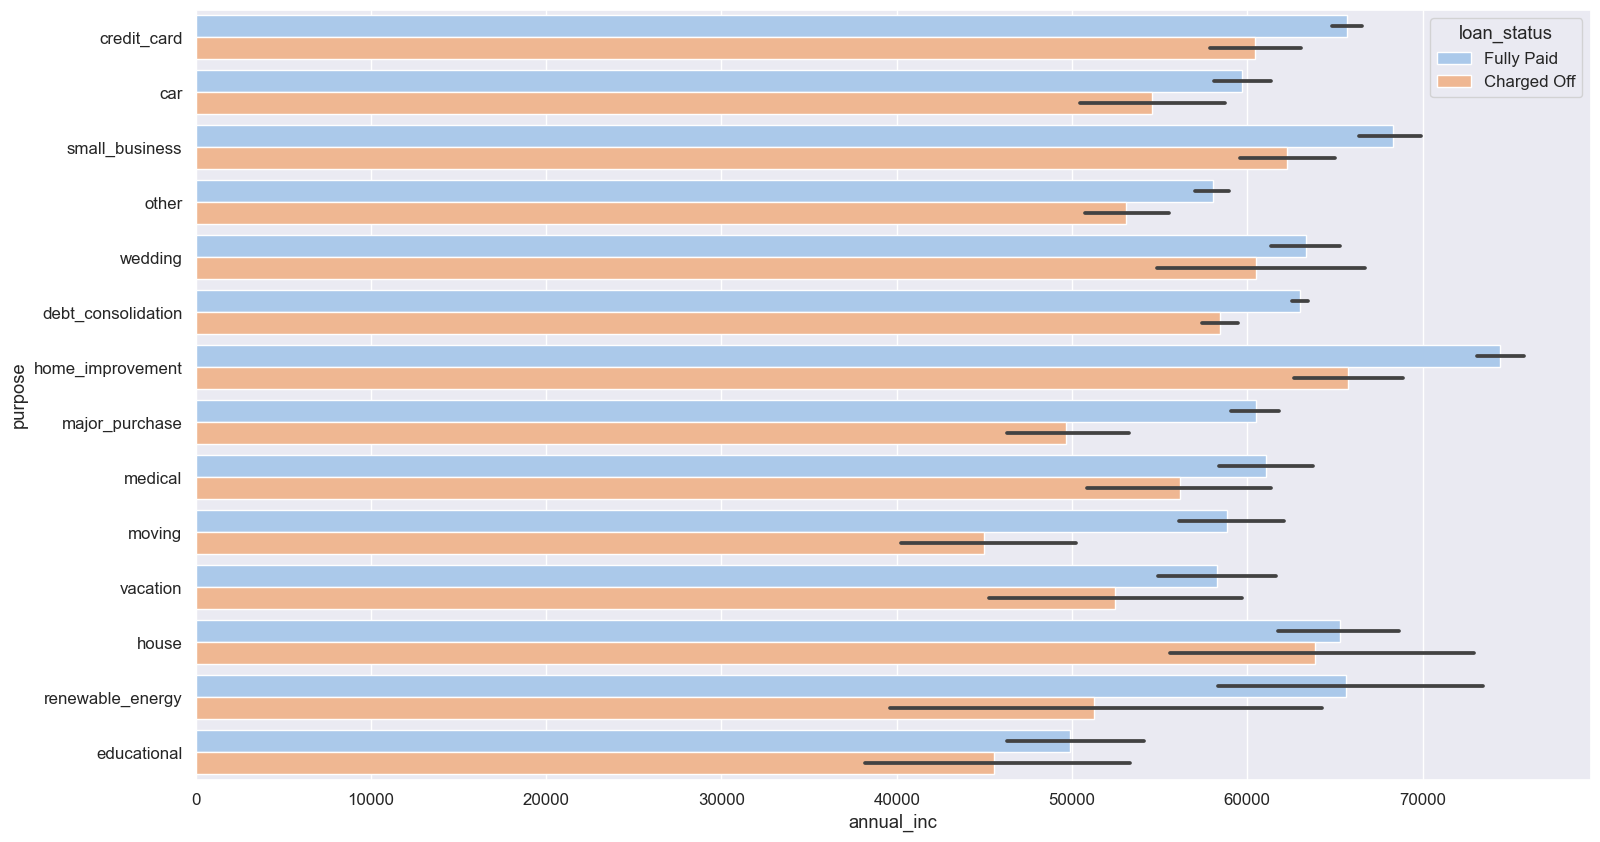

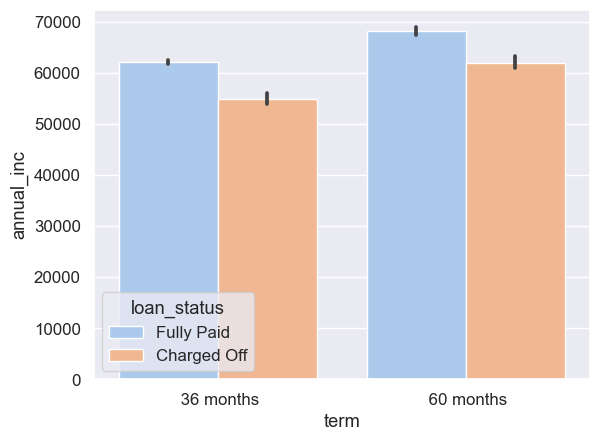

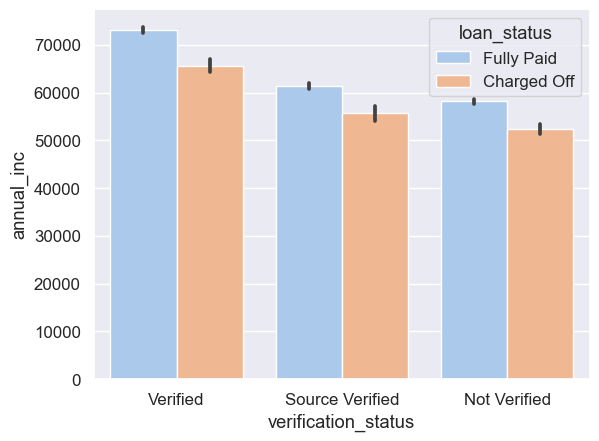

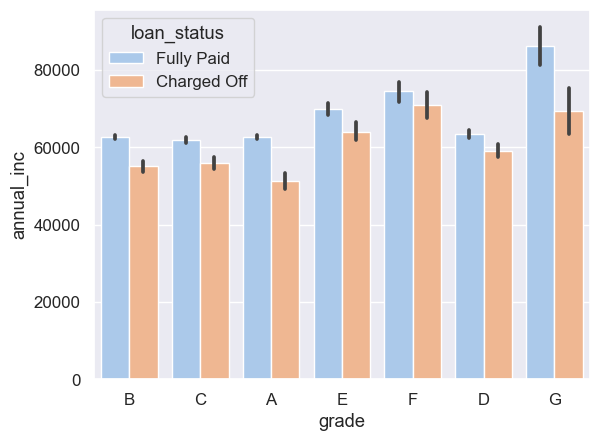

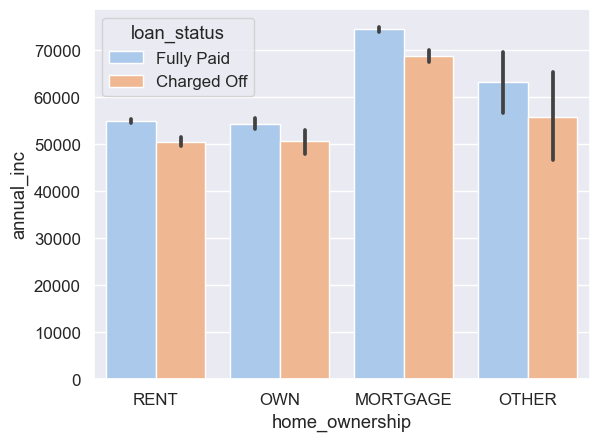

In [455]:
plt.figure(figsize=(18,10))
df2=da1[['purpose']]
for col in df2.columns:
    sns.barplot(y=df2[col],x=da1['annual_inc'], hue = da1['loan_status'],palette="pastel")
    plt.show()
df1=da1[['term','verification_status','grade','home_ownership']]
for col in df1.columns:
    sns.barplot(x=df1[col],y=da1['annual_inc'], hue = da1['loan_status'],palette="pastel")
    plt.show()
    


In [443]:
da1.columns

Index(['id', 'loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'pub_rec_bankruptcies', 'year', 'month',
       'int_rate_groups', 'open_acc_groups', 'revol_util_groups',
       'total_acc_groups', 'annual_inc_groups', 'installment_groups',
       'funded_amnt_inv_group', 'loan_amnt_groups', 'dti_groups'],
      dtype='object')

In [449]:
df3=da1.select_dtypes(include=['object'])
df3.head(2)

,term,grade,home_ownership,verification_status,loan_status,purpose
0,36 months,B,RENT,Verified,Fully Paid,credit_card
1,60 months,C,RENT,Source Verified,Charged Off,car
